<a href="https://colab.research.google.com/github/kyieon/Colab_DeepL/blob/master/Dacon7_acc80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Dacon7')
!unzip data.zip
!ls

Archive:  data.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission.csv          
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
Dacon7.ipynb  data.zip	result.csv  submission.csv  test.csv  train.csv


In [53]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from keras.optimizers import RMSprop, Nadam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# 실제 이미지 보기
# test_df = pd.read_csv('test.csv', index_col=0)

# for i in range(5):  
#   img = np.array(test_df.iloc[i, 1:]).reshape(28, 28).astype(np.float)
#   plt.imshow(img)
#   plt.show()

In [56]:
# 트레이닝

train_df = pd.read_csv('train.csv', index_col=0)

x_train = np.array(train_df.iloc[:, 2:]).reshape(-1, 28, 28, 1).astype(np.float)
y_train = to_categorical(train_df['digit'].values.astype('int32'), 10)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.9)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Nadam(), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

hits = model.fit(x_train, y_train, batch_size=128, epochs=300, validation_data=(x_test, y_test))



Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 128)       

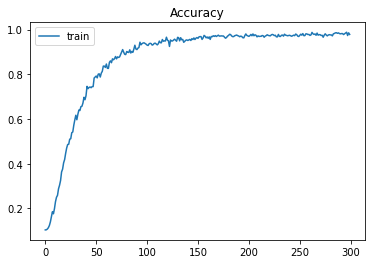

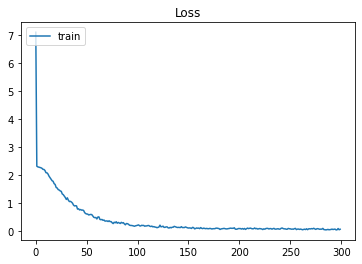

In [50]:

#예측모델 체크

acc = hits.history['accuracy']

plt.plot(acc)
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

loss = hits.history['loss']

plt.plot(loss)
plt.title('Loss')
plt.legend(['train'], loc='upper left')
plt.show()

In [51]:
#예측하기
test_df = pd.read_csv('test.csv', index_col=0)
x_predict = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28, 1).astype(np.float)
results = np.argmax(model.predict(x_predict), axis=1)

In [52]:
#제출
submission_df = pd.read_csv('submission.csv', index_col=0)
submission_df.digit = results
submission_df.to_csv('result.csv')